## Pràctica 9
### Simulació d' Esdeveniment Discrets

[<center><img src=https://raw.githubusercontent.com/gjover/modelitzacio/refs/heads/main/notebooks/static/Taller.png width=50%></center>](#bib_Law)

Tenim una fàbrica amb 5 estacions de treball amb un nombre diferent de màquines cada una.

- Estació 1: 2 màquines
- Estació 2: 1 màquina
- Estació 3: 3 màquines
- Estació 4: 3 màquines
- Estació 5: 4 màquines

Totes les màquines d'una mateixa estació són iguals.

A aquesta fàbrica produïm tres productes i cada producte té un circuit diferent.

- Producte A: 4, 3, 5
- Producte B: 5, 3, 1, 2
- Producte C: 1, 2, 3, 4, 5

Hem modelitzat el temps d'execució de les tasques com la suma de dues distribucions exponencials amb mitjana $\lambda/2$, és a dir, amb una distribució Erlang $(k=2, \lambda)$.

El temps mitjà de cada tasca depèn del producte:

- Tasques del producte A: 1.10, 0.80, 0.75 h 
- Tasques del producte B: 0.50, 0.60, 0.85, 0.50 h 
- Tasques del producte C: 1.20, 0.25, 0.70, 0.90, 1.00 h 

L'arribada d'encàrrecs segueix una distribució exponencial amb una mitjana de 15 minuts i les probabilitats de què es demane cada producte són A: 50%, B: 30%, C: 20%.

Simula la producció anual considerant 219 dies laborables amb jornades de 7.5h diàries.

Estima les mitjanes de:
- El temps d'espera total de cada producte
- El temps d'espera total del conjunt
- El temps de producció de cada producte a cada estació
- El nombre de productes en cua a cada estació
- El percentatge d'ús de les màquines de cada estació
- El temps d'espera a cada estació.

( A continuació teniu el codi de l'exercici fet a classe perquè el pugueu fer servir com a exemple)

In [1]:
import simpy
import numpy as np
import pandas as pd

In [2]:
def venda(env, taquilla, cua):
    """
    Simula el procés de venda
    """
    with taquilla.request() as req:
        yield req
        temps = np.random.exponential(10)
        print("venda", env.now, "trigarà", temps)
        yield env.timeout(temps)
        cua.loc[env.now] = cua.iloc[-1].pers - 1
        print(env.now, "Següent!")

In [3]:
def arribada(env, taquilla, cua):
    """
    Simula el procés d'arribada
    """
    # La cua comença buida
    cua.loc[0] = 0

    # Comença l'arribada de clients
    while True:
        temps = np.random.exponential(8)
        yield env.timeout(temps)
        print("arribat", env.now)
        cua.loc[env.now] = cua.iloc[-1].pers + 1
        v = venda(env, taquilla, cua)
        env.process(v)

In [4]:
def simulacio(n_taquilles, cua, temps):
    """
    Realitza la simulació
    """
    env = simpy.Environment()

    # La taquilla és un recurs limitat
    taquilla = simpy.Resource(env, capacity=n_taquilles)

    env.process(arribada(env, taquilla, cua))
    env.run(until=temps)
    return cua

In [5]:
n_taquilles = 2
cua = pd.DataFrame(columns=['pers'])

cua = simulacio(n_taquilles, cua, 300)

arribat 23.815643228326657
venda 23.815643228326657 trigarà 46.82589896962461
arribat 42.89516050714808
venda 42.89516050714808 trigarà 8.270797312251348
arribat 48.856096312695485
arribat 50.129889119617495
51.165957819399424 Següent!
venda 51.165957819399424 trigarà 10.992920972149223
arribat 53.49226332614787
62.158878791548645 Següent!
venda 62.158878791548645 trigarà 4.354773798223014
arribat 62.594492906551366
66.51365258977165 Següent!
venda 66.51365258977165 trigarà 20.657724406376673
70.64154219795127 Següent!
venda 70.64154219795127 trigarà 5.869975876320529
arribat 73.23420172571116
76.51151807427179 Següent!
venda 76.51151807427179 trigarà 4.794146607417484
arribat 79.45333975874182
81.30566468168928 Següent!
venda 81.30566468168928 trigarà 18.394469851604786
arribat 82.95994536571187
87.17137699614833 Següent!
venda 87.17137699614833 trigarà 0.4773022566039287
87.64867925275226 Següent!
arribat 90.6905431660502
venda 90.6905431660502 trigarà 2.6667548154229803
arribat 90.7

<Axes: >

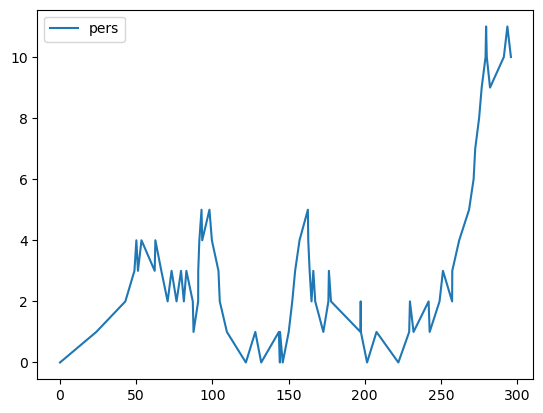

In [6]:
cua.plot()

# Referències

- <a id='bib_Law'></a> Law, Averill M., **2015**. *Simulation modeling and analysis*. Mcgraw-Hill.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: static/gfdl-logo-small.png
[GPL3]: static/gplv3-127x51.png